Text(12.5, 0.94, 'Pdisp(rp=50.0)')

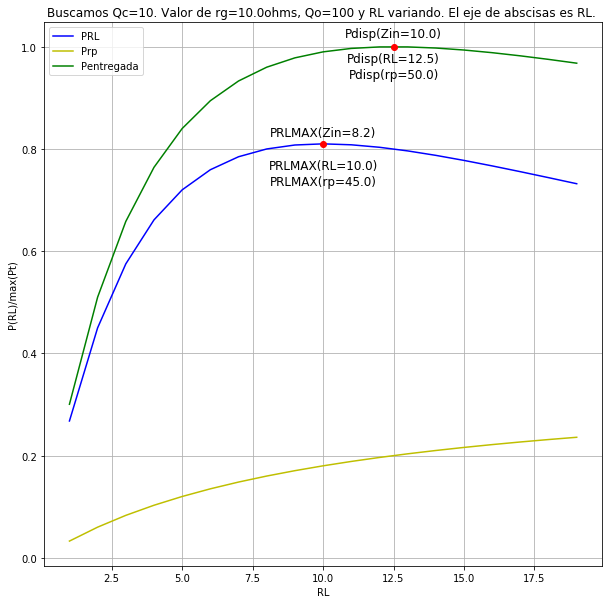

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tamaño del grafico
params = {'figure.figsize': (10, 10)}
plt.rcParams.update(params)

# Funciones para el calculo de potencias
def PRL(ig, RL, rg, Qo, Qc):
    wL = (1/Qc - 1/Qo) * (rl * rg)/(rl + rg)
    return ig**2 * (RL * rg**2)/(RL + rg)**2 * (1 - Qc/Qo)**2

def PRG(ig, RL, rg, Qo, Qc):
    wL = (1/Qc - 1/Qo) * (rl * rg)/(rl + rg)
    rp = Qo * wL
    return ig**2 / rg / (1/RL +1/rg + 1/rp )**2

def PRP(ig, RL, rg, Qo, Qc):
    wL = (1/Qc - 1/Qo) * (rl * rg)/(rl + rg)
    rp = Qo * wL
    return ig**2 / rp / (1/RL +1/rg + 1/rp )**2


# Datos
rg = 10    # resistencia del generador
fo = 1e6   # Frecuencia de trabajo
Qo = 100   # Q libre
Qc = 10    # Q cargado


# Defino valores para RL
rl = np.arange(1,20,1)

# Calculo las potencias para los valores de rl (estas variables son vectores)
prl  = PRL(1, rl, rg, Qo, Qc)
prp  = PRP(1, rl, rg, Qo, Qc)
prg  = PRG(1, rl, rg, Qo, Qc)
pt   = prl + prp
    
# Grafico el resultado 
plt.plot(rl, prl / max(pt), 'b',label = 'PRL')    
plt.plot(rl, prp / max(pt), 'y',label = 'Prp')    
plt.plot(rl, pt / max(pt), 'g',label = 'Pentregada')
plt.xlabel('RL')
plt.ylabel('P(RL)/max(Pt)')
plt.title('Buscamos Qc={:1.0f}. Valor de rg={:1.1f}ohms, Qo={:1.0f} y RL variando. El eje de abscisas es RL. '.format(Qc,rg,Qo))
plt.grid()
plt.legend()


# Agrego los puntos de 
# condición de MAXIMA TRANSFERENCIA DE POTENCIA A Q constante
# Para la maxima potencia a Qcte, (Q=10)
rl = rg
# Calculo wL
wL = (1/Qc - 1/Qo) * (rl * rg)/(rl + rg)
# dado que esta defindo Qo calculo la perdida:
# Qo = rp/wL
rp = Qo * wL
Zin = rl * rp /(rl + rp)
Prl = PRL(1, rl, rg, Qo, Qc) 

# Marco en el grafico
plt.plot(rl, Prl / max(pt), 'or')    
plt.annotate(s='PRLMAX(Zin={:1.1f})'.format(Zin),xy=(rl,Prl*1.02/ max(pt)), xycoords='data',fontsize=12.0,textcoords='data',ha='center')
plt.annotate(s='PRLMAX(RL={:1.1f})'.format(rl),xy=(rl,Prl*0.94/ max(pt)), xycoords='data',fontsize=12.0,textcoords='data',ha='center')
plt.annotate(s='PRLMAX(rp={:1.1f})'.format(rp),xy=(rl,Prl*0.90/ max(pt)), xycoords='data',fontsize=12.0,textcoords='data',ha='center')


# Condición de MAXIMA TRANSFERENCIA DE POTENCIA 
Zin = rg
# Para el calculo de wl usamos la resistencia total 
# Calculo wL
rt = (rg * Zin)/(rg + Zin)
wL = (1/Qc) * rt

# dado que esta defindo Qo calculo la perdida:
# Qo = rp/wL
rp = Qo * wL
#1/rl = (1/Zin) - (1/rp) 
rl = 1/( (1/Zin) - (1/rp))

Prl = PRL(1, rl, rg, Qo, Qc) / max(pt)
# Marco en el grafico
plt.plot(rl,  max(pt)/max(pt), 'or') 
plt.annotate(s='Pdisp(Zin={:1.1f})'.format(Zin),xy=(rl,1.02), xycoords='data',fontsize=12.0,textcoords='data',ha='center')
plt.annotate(s='Pdisp(RL={:1.1f})'.format(rl),xy=(rl,0.97), xycoords='data',fontsize=12.0,textcoords='data',ha='center')
plt.annotate(s='Pdisp(rp={:1.1f})'.format(rp),xy=(rl,0.94), xycoords='data',fontsize=12.0,textcoords='data',ha='center')

#plt.savefig('fig/ejemploMTEQcte.png')


    
